# Project 1 K-Means Clustering
# ------------------------------ Diabetes Dataset ------------------------------------
# Load and Prepare Dataset

In [71]:
import pandas as pd

In [72]:
diabetes_df = pd.read_csv("diabetes_prediction_dataset.csv")

diabetes_df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [73]:
# drop 'diabetes' column
new_diabetes_df = diabetes_df.drop(columns=['diabetes'])

# check new dataframe shape and columns
print("Original shape:", diabetes_df.shape)
print("After dropping 'diabetes' column:", new_diabetes_df.shape)

new_diabetes_df.head()

Original shape: (100000, 9)
After dropping 'diabetes' column: (100000, 8)


gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155

In [74]:
# identify null values
new_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.1+ MB


In [75]:
# list out categorical and numerical columns
categorical_cols = new_diabetes_df.select_dtypes(include=["object","category"]).columns.tolist()
numerical_cols = new_diabetes_df.select_dtypes(include=["number"]).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
['gender', 'smoking_history']

Numerical columns:
['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']


# Encode Categorical Columns

In [76]:
print("Unique values in gender:", new_diabetes_df['gender'].unique())
print("Unique values in smoking_history:", new_diabetes_df['smoking_history'].unique())

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in smoking_history: ['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [77]:
# encode categorical variables using One-Hot Encoding
encoded_diabetes_df = pd.get_dummies(new_diabetes_df, columns=['gender', 'smoking_history'], drop_first=True)

print("Shape after encoding:", encoded_diabetes_df.shape)
encoded_diabetes_df.head()

Shape after encoding: (100000, 13)


age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   gender_Male  gender_Other  smoking_history_current  smoking_history_ever  \
0            0             0                        0                     0   
1            0             0                        0                     0   
2            1             0                        0                     0   
3            0             0                        1                     0   
4            1             0                        1                     0   

   smoking_history_former  smoking_history_never  smoking_history_not current  
0                       0                      1                            0  
1                       0                      0                            0  
2                       0                      1                            0  
3                       0                      0                            0  
4                       0                      0                            0

In [78]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize, StandardScaler
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

In [79]:
# define elbow graph function
def plot_elbow(X, title):
    wcss = []
    K = range(2, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    # automatically detect the elbow point
    kn = KneeLocator(K, wcss, curve='convex', direction='decreasing')
    best_k = kn.knee  # returns the elbow (None if not found)
    
    # plot elbow curve
    plt.figure(figsize=(6,4))
    plt.plot(K, wcss, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title(f'Elbow Graph - {title}')
    
    # mark the detected elbow point
    if best_k is not None:
        plt.axvline(x=best_k, linestyle='--', color='red', label=f'Elbow at k={best_k}')
        plt.legend()
    plt.show()
    
    return best_k

In [80]:
unscaled_diabetes_df = encoded_diabetes_df.copy()

In [81]:
# scale the data
scaler = StandardScaler()
scaled_diabetes_df = scaler.fit_transform(unscaled_diabetes_df)

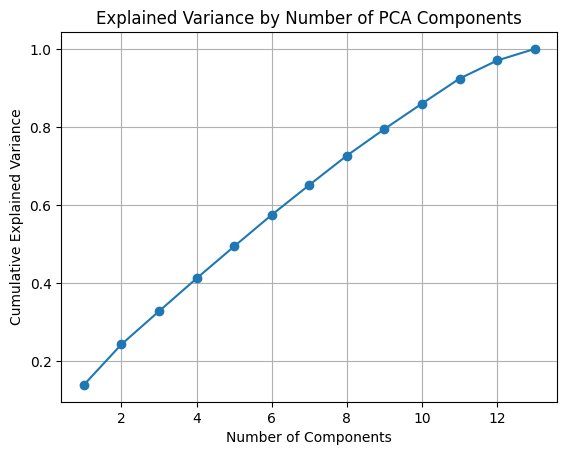

In [82]:
# check for number of PCA components
pca = PCA().fit(scaled_diabetes_df)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

# K-Means (Euclidean) PCA BEFORE clustering


=== K-Means (Euclidean) PCA BEFORE Clustering ===


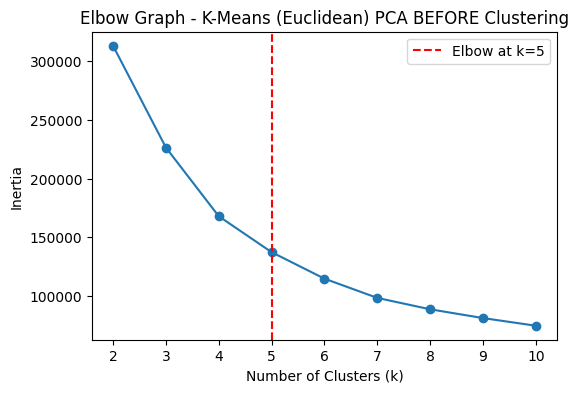

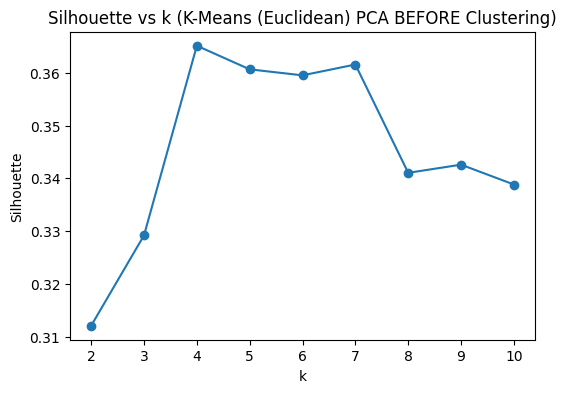

Best k (Silhouette) = 4, Score = 0.3651


In [83]:
print("\n=== K-Means (Euclidean) PCA BEFORE Clustering ===")

# PCA before clustering
pca_scaled_before = PCA(n_components=3, random_state=42)
scaled_diabetes_df_pca_before = pca_scaled_before.fit_transform(scaled_diabetes_df)

# elbow graph
best_k = plot_elbow(scaled_diabetes_df_pca_before, "K-Means (Euclidean) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_diabetes_df_pca_before)
    score = silhouette_score(scaled_diabetes_df_pca_before, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_euc_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_before = kmeans_scaled_euc_pca_before.fit_predict(scaled_diabetes_df_pca_before)

In [84]:
# store silhouette score for experiment analysis visualisation
diabetes_silhouette_scores_1 = silhouette_scores.copy()

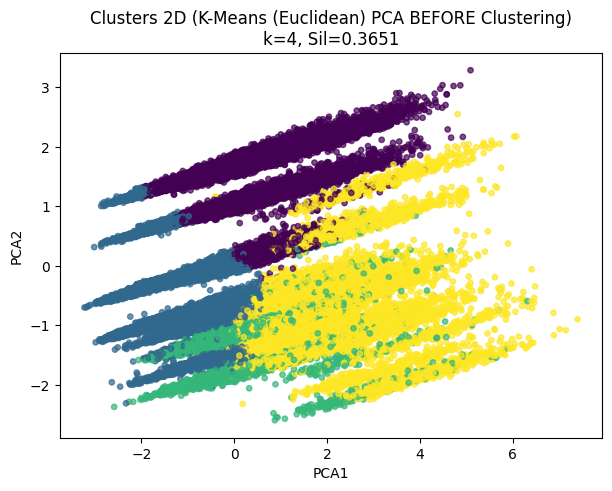

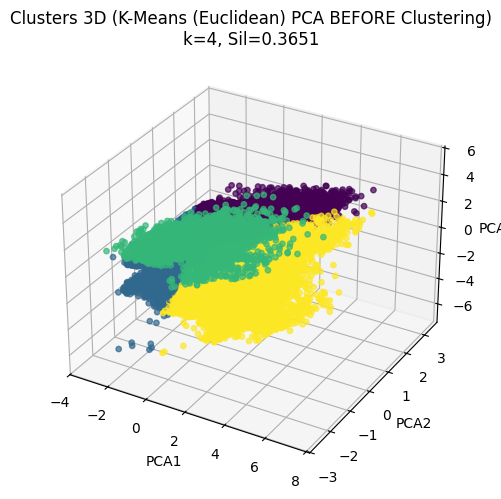

In [85]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_diabetes_df_pca_before[:,0], scaled_diabetes_df_pca_before[:,1],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_diabetes_df_pca_before[:,0], scaled_diabetes_df_pca_before[:,1],
    scaled_diabetes_df_pca_before[:,2],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# K-Means (Euclidean) PCA AFTER clustering


=== K-Means (Euclidean) PCA AFTER Clustering ===


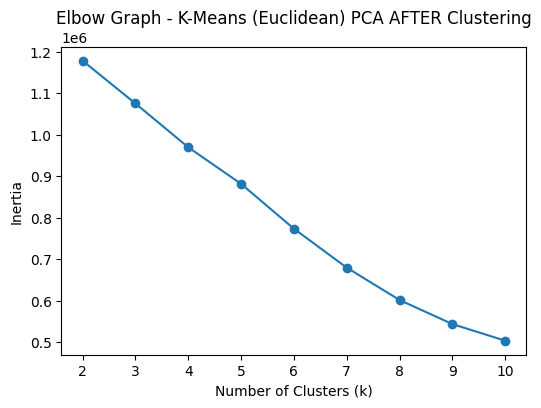

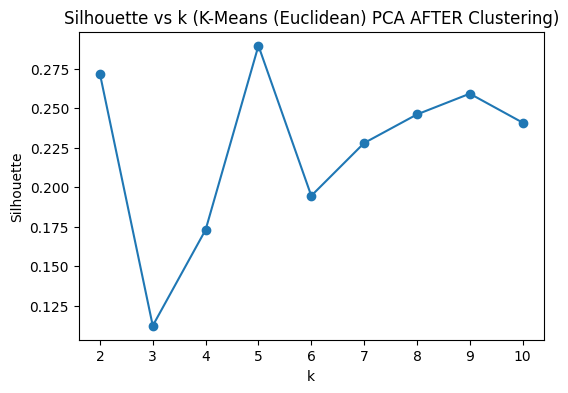

Best k (Silhouette) = 5, Score = 0.2895


In [86]:
print("\n=== K-Means (Euclidean) PCA AFTER Clustering ===")

# elbow graph
best_k = plot_elbow(scaled_diabetes_df, "K-Means (Euclidean) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_diabetes_df)
    score = silhouette_score(scaled_diabetes_df, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA AFTER Clustering)')
plt.show()

best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# choose best k from silhouette
kmeans_scaled_euc_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_after = kmeans_scaled_euc_pca_after.fit_predict(scaled_diabetes_df)

# PCA after clustering
pca_scaled_after = PCA(n_components=3, random_state=42)
scaled_diabetes_df_pca_after = pca_scaled_after.fit_transform(scaled_diabetes_df)

In [87]:
# store silhouette score for experiment analysis visualisation
diabetes_silhouette_scores_2 = silhouette_scores.copy()

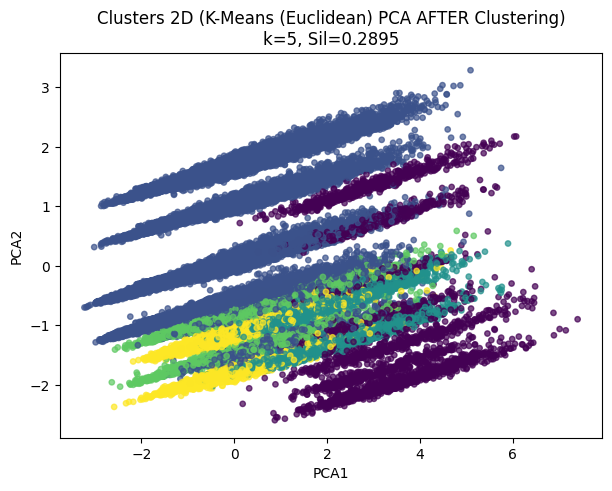

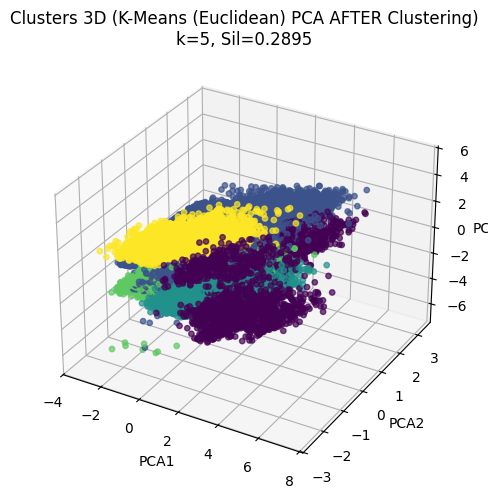

In [88]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_diabetes_df_pca_after[:,0], scaled_diabetes_df_pca_after[:,1],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_diabetes_df_pca_after[:,0], scaled_diabetes_df_pca_after[:,1], scaled_diabetes_df_pca_after[:,2],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Normalised K-Means (Cosine Distance) PCA BEFORE clustering


=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===


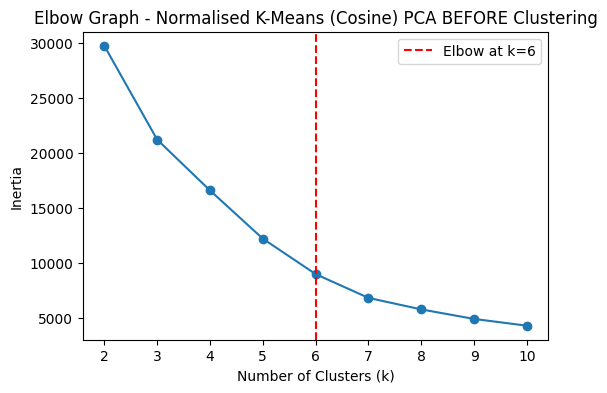

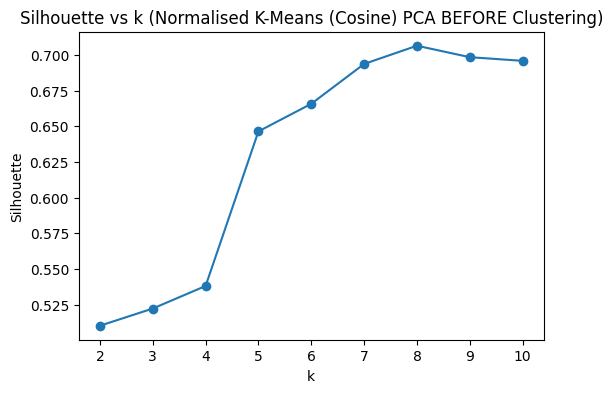

Best k (Silhouette) = 8, Score = 0.7065


In [89]:
from sklearn.preprocessing import normalize

print("\n=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===")

# scale then normalise
scaled_diabetes_df = scaler.fit_transform(unscaled_diabetes_df)
scaled_normalized_diabetes_df = normalize(scaled_diabetes_df)

# PCA before clustering
pca_scaled_norm_before = PCA(n_components=3, random_state=42)
scaled_norm_df_pca_before = pca_scaled_norm_before.fit_transform(scaled_normalized_diabetes_df)

# elbow graph
best_k = plot_elbow(scaled_norm_df_pca_before, "Normalised K-Means (Cosine) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_norm_df_pca_before)
    score = silhouette_score(scaled_norm_df_pca_before, labels, metric='cosine')
    silhouette_scores.append(score)
    
# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_before = kmeans_scaled_cos_pca_before.fit_predict(scaled_norm_df_pca_before)

In [90]:
# store silhouette score for experiment analysis visualisation
diabetes_silhouette_scores_3 = silhouette_scores.copy()

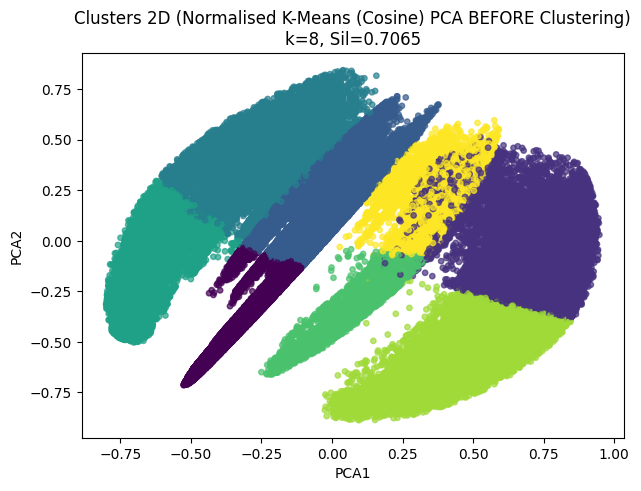

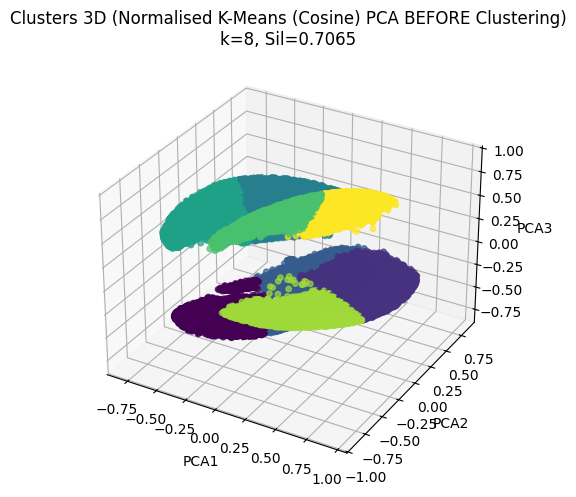

In [91]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_df_pca_before[:,0], scaled_norm_df_pca_before[:,1],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_df_pca_before[:,0], scaled_norm_df_pca_before[:,1], scaled_norm_df_pca_before[:,2],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Normalised K-Means (Cosine Distance) PCA AFTER clustering


=== Normalised K-Means (Cosine) PCA AFTER Clustering ===


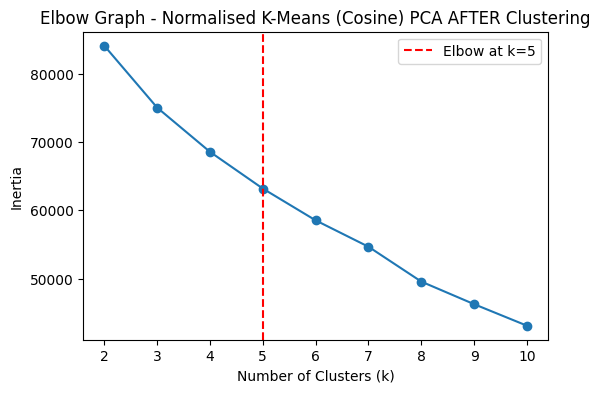

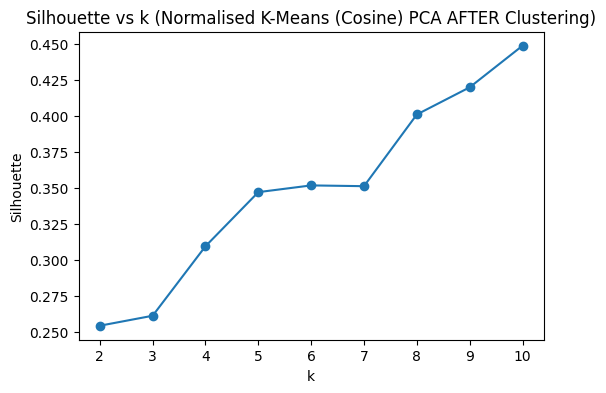

Best k (Silhouette) = 10, Score = 0.4488


In [92]:
print("\n=== Normalised K-Means (Cosine) PCA AFTER Clustering ===")

# scale then normalise
scaled_diabetes_df = scaler.fit_transform(unscaled_diabetes_df)
scaled_normalized_diabetes_df = normalize(scaled_diabetes_df)

# elbow graph
best_k = plot_elbow(scaled_normalized_diabetes_df, "Normalised K-Means (Cosine) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_normalized_diabetes_df)
    score = silhouette_score(scaled_normalized_diabetes_df, labels, metric='cosine')
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA AFTER Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_after = kmeans_scaled_cos_pca_after.fit_predict(scaled_normalized_diabetes_df)

# PCA after clustering
pca_scaled_norm_after = PCA(n_components=3, random_state=42)
scaled_norm_df_pca_after = pca_scaled_norm_after.fit_transform(scaled_normalized_diabetes_df)

In [93]:
# store silhouette score for experiment analysis visualisation
diabetes_silhouette_scores_4 = silhouette_scores.copy()

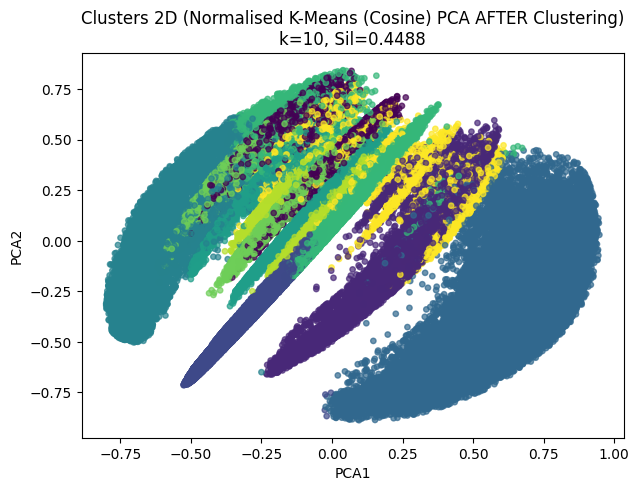

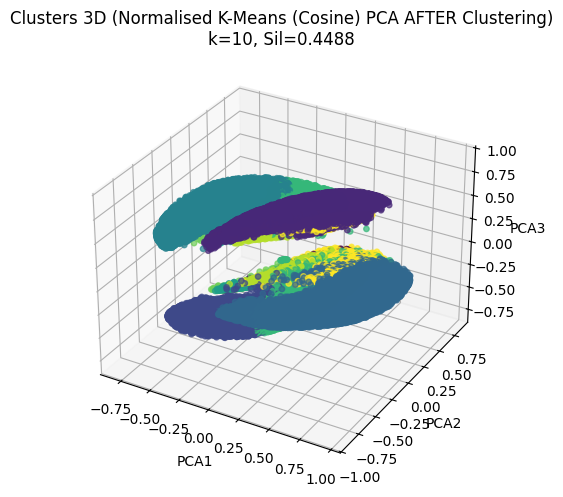

In [94]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_df_pca_after[:,0], scaled_norm_df_pca_after[:,1],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_df_pca_after[:,0], scaled_norm_df_pca_after[:,1], scaled_norm_df_pca_after[:,2],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# ------------------------------ Body Fat Dataset ------------------------------------
# Load and Prepare Dataset

In [95]:
body_df = pd.read_csv("bodyfat.csv")

body_df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [96]:
# drop 'BodyFat' column
new_body_df = body_df.drop(columns=['BodyFat'])

# check new dataframe shape and columns
print("Original shape:", body_df.shape)
print("After dropping 'BodyFat' column:", new_body_df.shape)

new_body_df.head()

Original shape: (252, 15)
After dropping 'BodyFat' column: (252, 14)


Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7

In [97]:
# identify null values
new_body_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 27.7 KB


In [98]:
# list out categorical and numerical columns
categorical_cols = new_body_df.select_dtypes(include=["object","category"]).columns.tolist()
numerical_cols = new_body_df.select_dtypes(include=["number"]).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
[]

Numerical columns:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


In [99]:
# scale the data
scaler = StandardScaler()
scaled_body_df = scaler.fit_transform(new_body_df)

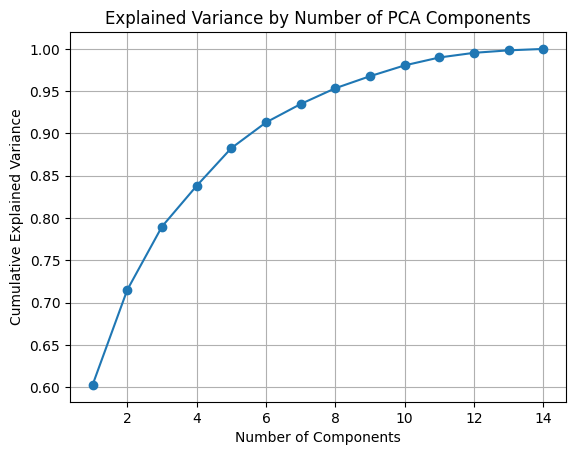

In [100]:
# check for number of PCA components
pca = PCA().fit(scaled_body_df)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

# K-Means (Euclidean) PCA BEFORE clustering


=== K-Means (Euclidean) PCA BEFORE Clustering ===


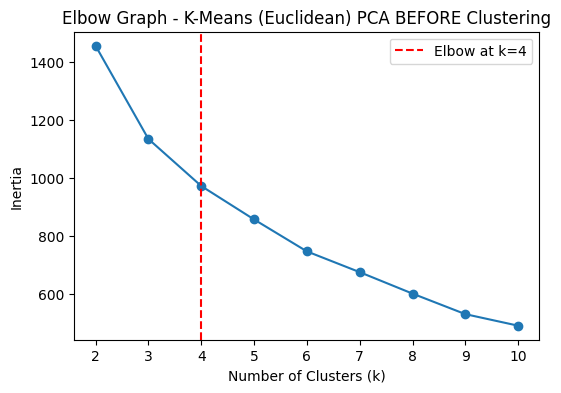

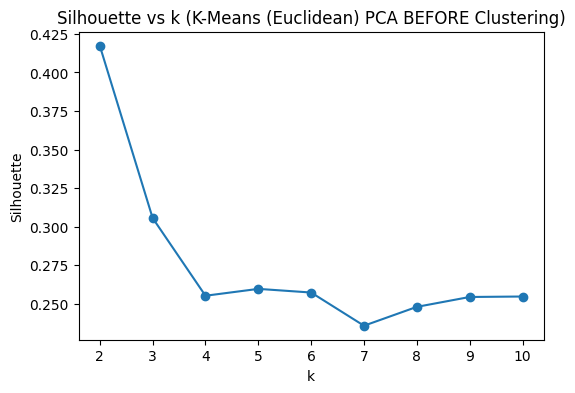

Best k (Silhouette) = 2, Score = 0.4173


In [101]:
print("\n=== K-Means (Euclidean) PCA BEFORE Clustering ===")

# PCA before clustering
pca_scaled_before = PCA(n_components=3, random_state=42)
scaled_body_df_pca_before = pca_scaled_before.fit_transform(scaled_body_df)

# elbow graph
best_k = plot_elbow(scaled_body_df_pca_before, "K-Means (Euclidean) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_body_df_pca_before)
    score = silhouette_score(scaled_body_df_pca_before, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_euc_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_before = kmeans_scaled_euc_pca_before.fit_predict(scaled_body_df_pca_before)

In [102]:
# store silhouette score for experiment analysis visualisation
body_silhouette_scores_1 = silhouette_scores.copy()

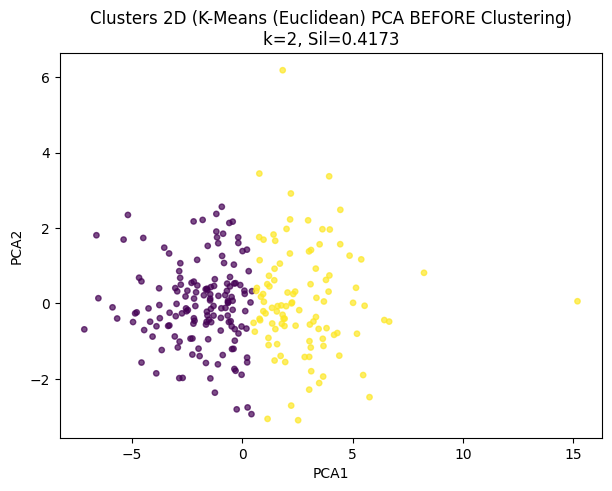

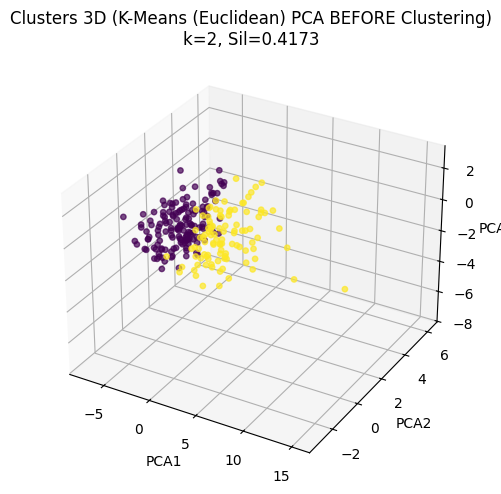

In [103]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_body_df_pca_before[:,0], scaled_body_df_pca_before[:,1],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_body_df_pca_before[:,0], scaled_body_df_pca_before[:,1],
    scaled_body_df_pca_before[:,2],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# K-Means (Euclidean) PCA AFTER clustering


=== K-Means (Euclidean) PCA AFTER Clustering ===


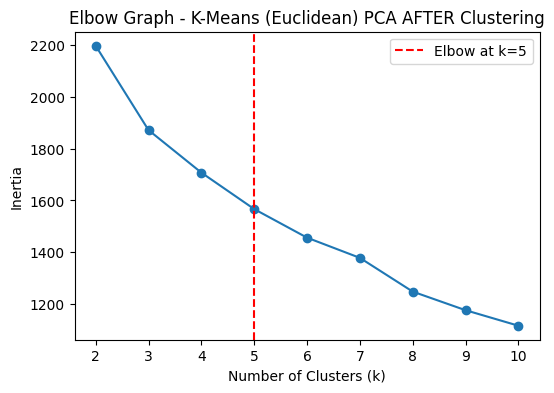

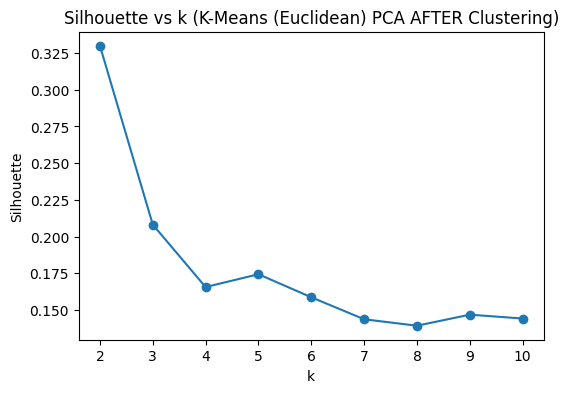

Best k (Silhouette) = 2, Score = 0.3300


In [104]:
print("\n=== K-Means (Euclidean) PCA AFTER Clustering ===")

# elbow graph
best_k = plot_elbow(scaled_body_df, "K-Means (Euclidean) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_body_df)
    score = silhouette_score(scaled_body_df, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA AFTER Clustering)')
plt.show()

best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# choose best k from silhouette
kmeans_scaled_euc_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_after = kmeans_scaled_euc_pca_after.fit_predict(scaled_body_df)

# PCA after clustering
pca_scaled_after = PCA(n_components=3, random_state=42)
scaled_body_df_pca_after = pca_scaled_after.fit_transform(scaled_body_df)

In [105]:
# store silhouette score for experiment analysis visualisation
body_silhouette_scores_2 = silhouette_scores.copy()

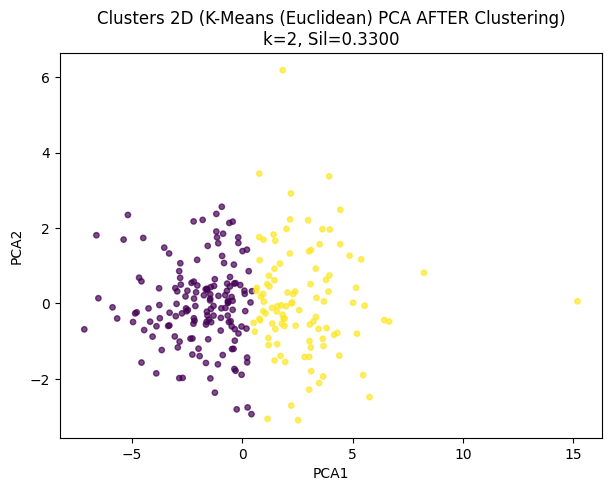

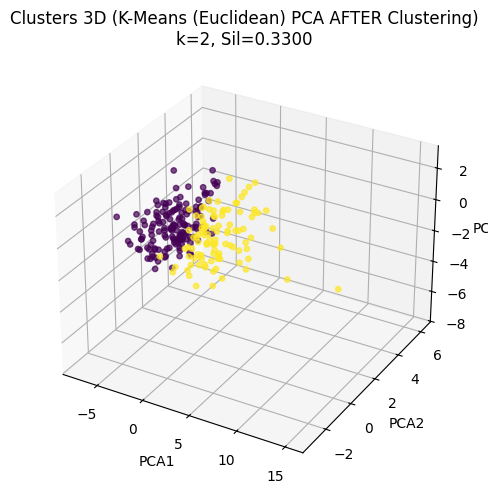

In [106]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_body_df_pca_after[:,0], scaled_body_df_pca_after[:,1],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_body_df_pca_after[:,0], scaled_body_df_pca_after[:,1], scaled_body_df_pca_after[:,2],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Normalised K-Means (Cosine Distance) PCA BEFORE clustering


=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===


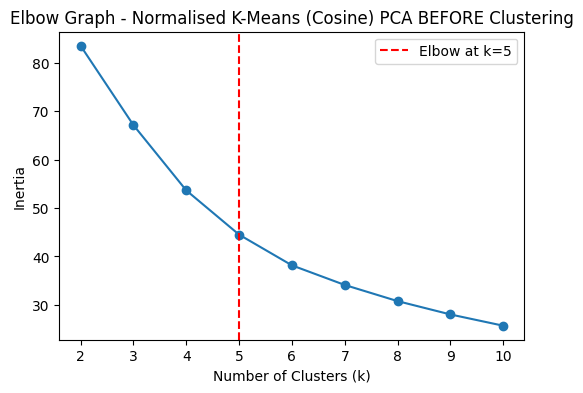

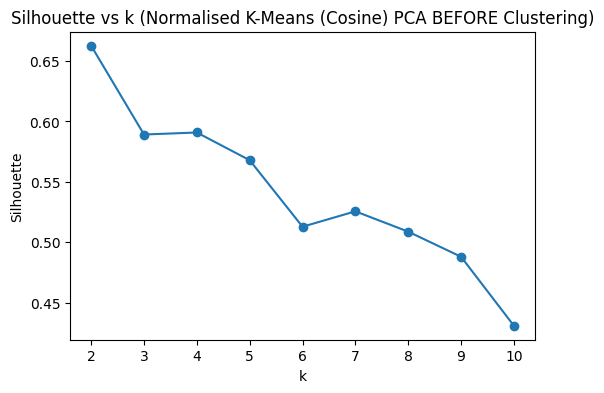

Best k (Silhouette) = 2, Score = 0.6627


In [107]:
from sklearn.preprocessing import normalize

print("\n=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===")

# scale then normalise
scaled_body_df = scaler.fit_transform(new_body_df)
scaled_normalized_body_df = normalize(scaled_body_df)

# PCA before clustering
pca_scaled_norm_before = PCA(n_components=3, random_state=42)
scaled_norm_body_df_pca_before = pca_scaled_norm_before.fit_transform(scaled_normalized_body_df)

# elbow graph
best_k = plot_elbow(scaled_norm_body_df_pca_before, "Normalised K-Means (Cosine) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_norm_body_df_pca_before)
    score = silhouette_score(scaled_norm_body_df_pca_before, labels, metric='cosine')
    silhouette_scores.append(score)
    
# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_before = kmeans_scaled_cos_pca_before.fit_predict(scaled_norm_body_df_pca_before)

In [108]:
# store silhouette score for experiment analysis visualisation
body_silhouette_scores_3 = silhouette_scores.copy()

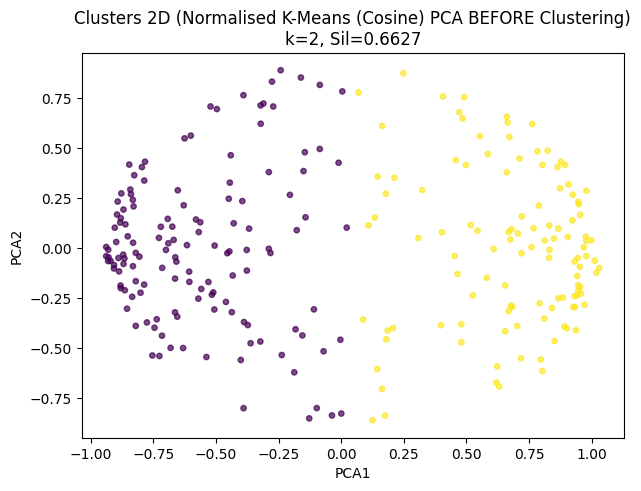

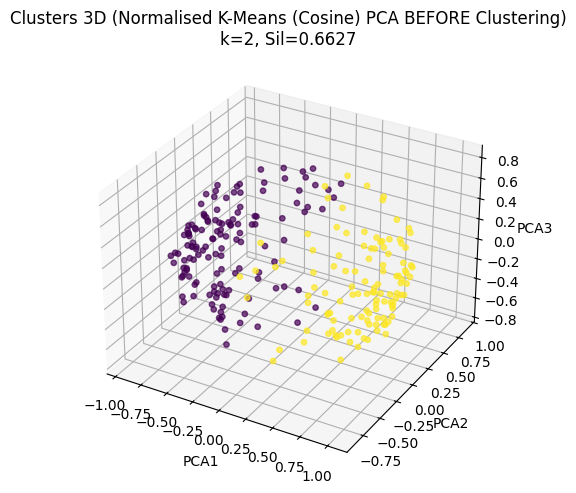

In [109]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_body_df_pca_before[:,0], scaled_norm_body_df_pca_before[:,1],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_body_df_pca_before[:,0], scaled_norm_body_df_pca_before[:,1], scaled_norm_body_df_pca_before[:,2],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Normalised K-Means (Cosine Distance) PCA AFTER clustering


=== Normalised K-Means (Cosine) PCA AFTER Clustering ===


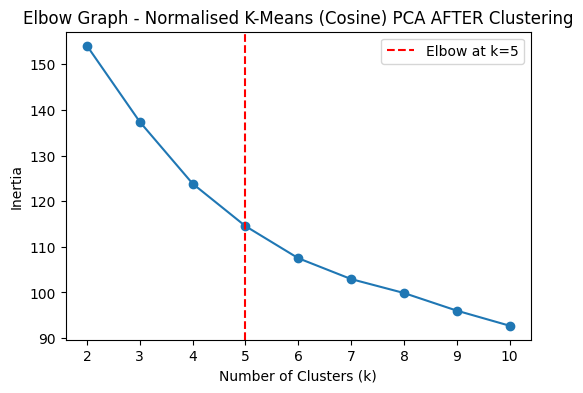

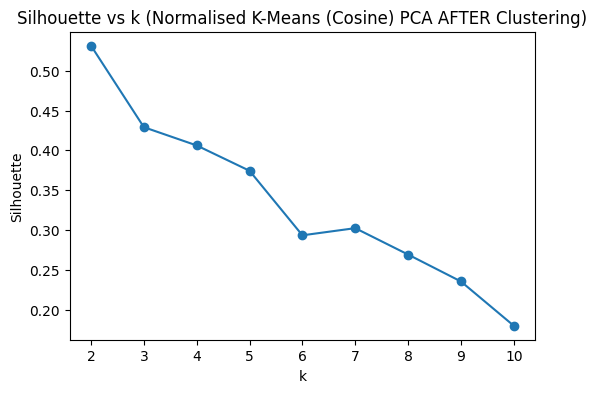

Best k (Silhouette) = 2, Score = 0.5313


In [110]:
print("\n=== Normalised K-Means (Cosine) PCA AFTER Clustering ===")

# scale then normalise
scaled_body_df = scaler.fit_transform(new_body_df)
scaled_normalized_body_df = normalize(scaled_body_df)

# elbow graph
best_k = plot_elbow(scaled_normalized_body_df, "Normalised K-Means (Cosine) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_normalized_body_df)
    score = silhouette_score(scaled_normalized_body_df, labels, metric='cosine')
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA AFTER Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_after = kmeans_scaled_cos_pca_after.fit_predict(scaled_normalized_body_df)

# PCA after clustering
pca_scaled_norm_after = PCA(n_components=3, random_state=42)
scaled_norm_body_df_pca_after = pca_scaled_norm_after.fit_transform(scaled_normalized_body_df)

In [111]:
# store silhouette score for experiment analysis visualisation
body_silhouette_scores_4 = silhouette_scores.copy()

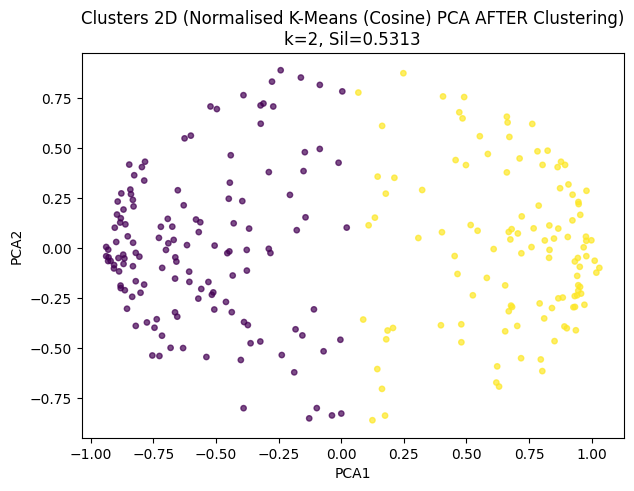

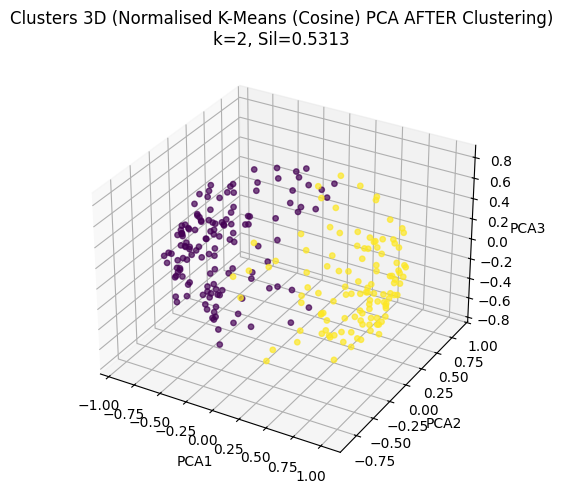

In [112]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_body_df_pca_after[:,0], scaled_norm_body_df_pca_after[:,1],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_body_df_pca_after[:,0], scaled_norm_body_df_pca_after[:,1], scaled_norm_body_df_pca_after[:,2],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# ----------------------------- World Bank Dataset ------------------------------------
# Load and Prepare Dataset

In [113]:
bank_df = pd.read_csv("world_bank_dataset.csv")

bank_df.head()

Country  Year     GDP (USD)   Population  Life Expectancy  \
0  Brazil  2010  1.493220e+12  829020000.0             66.7   
1   Japan  2011  1.756270e+13  897010000.0             61.4   
2   India  2012  1.642688e+13  669850000.0             69.1   
3  Mexico  2013  1.189001e+13  113800000.0             80.1   
4   India  2014  2.673020e+12   29710000.0             62.7   

   Unemployment Rate (%)  CO2 Emissions (metric tons per capita)  \
0                   3.81                                   10.79   
1                  17.98                                   15.67   
2                  16.02                                    2.08   
3                   6.26                                   19.13   
4                   3.10                                   15.66   

   Access to Electricity (%)  
0                      76.76  
1                      67.86  
2                      81.08  
3                      53.46  
4                      82.17

In [114]:
# drop 'Country' and 'Year' column
new_bank_df = bank_df.drop(columns=['Country', 'Year'])

# check new dataframe shape and columns
print("Original shape:", bank_df.shape)
print("After dropping 'Country' and 'Year' column:", new_bank_df.shape)

new_bank_df.head()

Original shape: (200, 8)
After dropping 'Country' and 'Year' column: (200, 6)


GDP (USD)   Population  Life Expectancy  Unemployment Rate (%)  \
0  1.493220e+12  829020000.0             66.7                   3.81   
1  1.756270e+13  897010000.0             61.4                  17.98   
2  1.642688e+13  669850000.0             69.1                  16.02   
3  1.189001e+13  113800000.0             80.1                   6.26   
4  2.673020e+12   29710000.0             62.7                   3.10   

   CO2 Emissions (metric tons per capita)  Access to Electricity (%)  
0                                   10.79                      76.76  
1                                   15.67                      67.86  
2                                    2.08                      81.08  
3                                   19.13                      53.46  
4                                   15.66                      82.17

In [115]:
# identify null values
new_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GDP (USD)                               200 non-null    float64
 1   Population                              200 non-null    float64
 2   Life Expectancy                         200 non-null    float64
 3   Unemployment Rate (%)                   200 non-null    float64
 4   CO2 Emissions (metric tons per capita)  200 non-null    float64
 5   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6)
memory usage: 9.5 KB


In [116]:
# list out categorical and numerical columns
categorical_cols = new_bank_df.select_dtypes(include=["object","category"]).columns.tolist()
numerical_cols = new_bank_df.select_dtypes(include=["number"]).columns.tolist()

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
[]

Numerical columns:
['GDP (USD)', 'Population', 'Life Expectancy', 'Unemployment Rate (%)', 'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']


In [117]:
# scale the data
scaler = StandardScaler()
scaled_bank_df = scaler.fit_transform(new_bank_df)

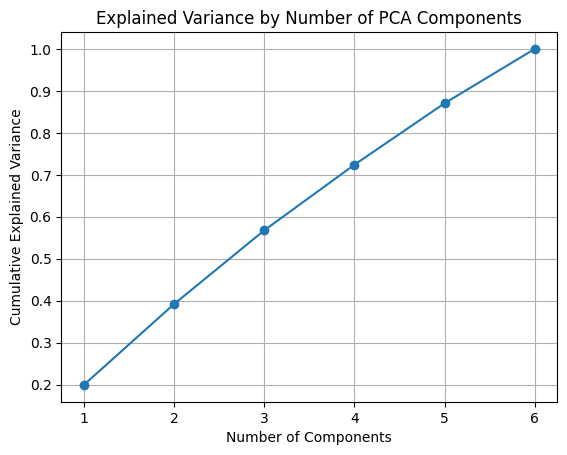

In [118]:
# check for number of PCA components
pca = PCA().fit(scaled_bank_df)
explained = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of PCA Components')
plt.grid(True)
plt.show()

# K-Means (Euclidean) PCA BEFORE clustering


=== K-Means (Euclidean) PCA BEFORE Clustering ===


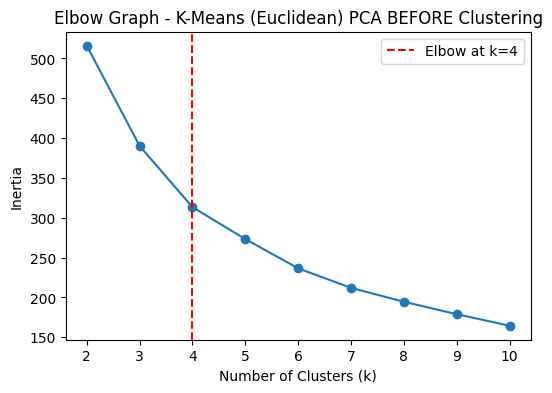

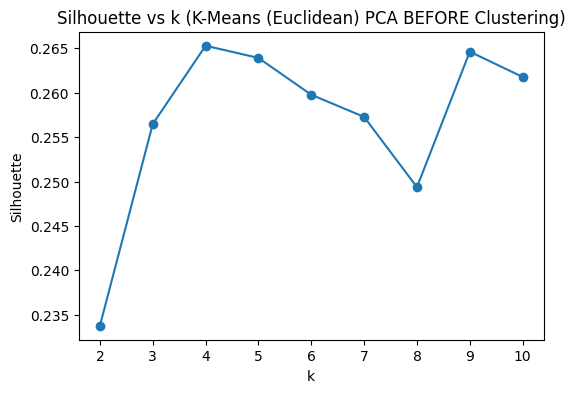

Best k (Silhouette) = 4, Score = 0.2653


In [119]:
print("\n=== K-Means (Euclidean) PCA BEFORE Clustering ===")

# PCA before clustering
pca_scaled_before = PCA(n_components=3, random_state=42)
scaled_bank_df_pca_before = pca_scaled_before.fit_transform(scaled_bank_df)

# elbow graph
best_k = plot_elbow(scaled_bank_df_pca_before, "K-Means (Euclidean) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_bank_df_pca_before)
    score = silhouette_score(scaled_bank_df_pca_before, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_euc_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_before = kmeans_scaled_euc_pca_before.fit_predict(scaled_bank_df_pca_before)

In [120]:
# store silhouette score for experiment analysis visualisation
bank_silhouette_scores_1 = silhouette_scores.copy()

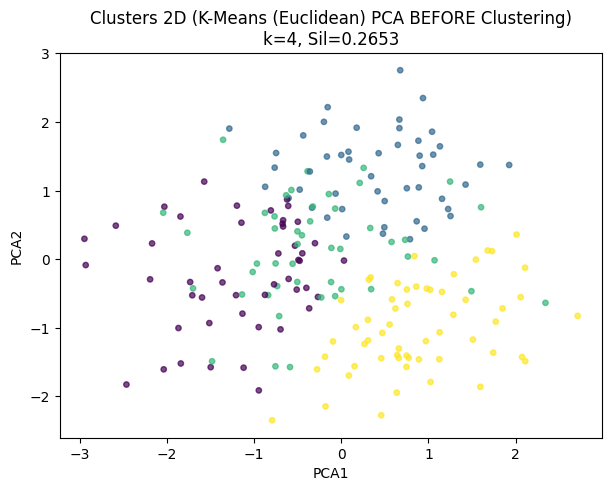

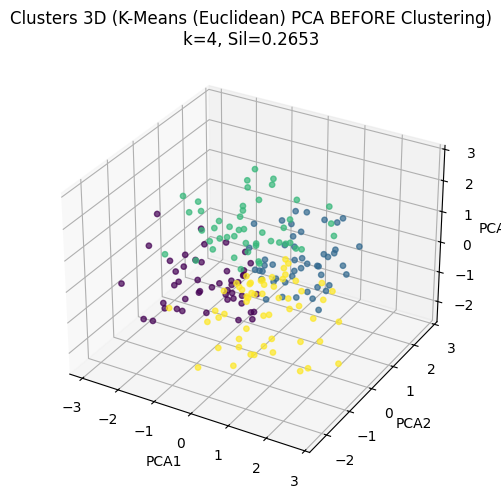

In [121]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_bank_df_pca_before[:,0], scaled_bank_df_pca_before[:,1],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)
plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_bank_df_pca_before[:,0], scaled_bank_df_pca_before[:,1],
    scaled_bank_df_pca_before[:,2],
    c=labels_scaled_euc_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# K-Means (Euclidean) PCA AFTER clustering


=== K-Means (Euclidean) PCA AFTER Clustering ===


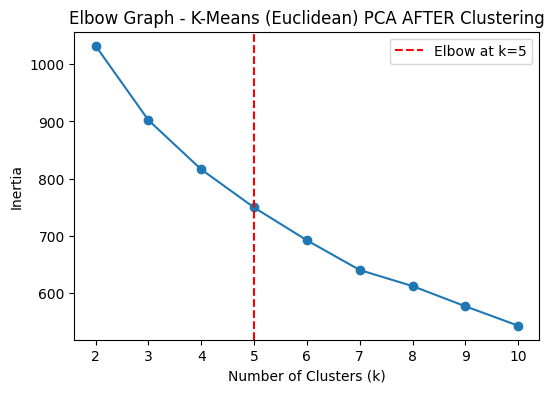

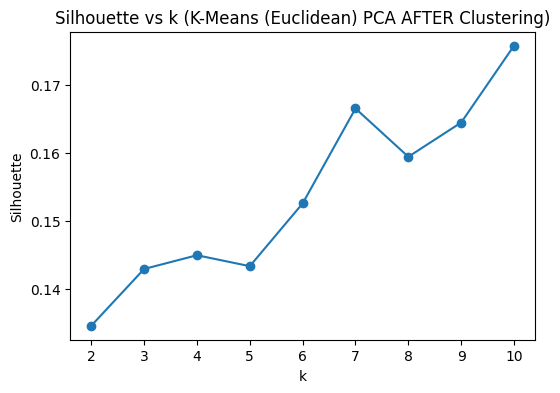

Best k (Silhouette) = 10, Score = 0.1758


In [122]:
print("\n=== K-Means (Euclidean) PCA AFTER Clustering ===")

# elbow graph
best_k = plot_elbow(scaled_bank_df, "K-Means (Euclidean) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_bank_df)
    score = silhouette_score(scaled_bank_df, labels)
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (K-Means (Euclidean) PCA AFTER Clustering)')
plt.show()

best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# choose best k from silhouette
kmeans_scaled_euc_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_euc_pca_after = kmeans_scaled_euc_pca_after.fit_predict(scaled_bank_df)

# PCA after clustering
pca_scaled_after = PCA(n_components=3, random_state=42)
scaled_bank_df_pca_after = pca_scaled_after.fit_transform(scaled_bank_df)

In [123]:
# store silhouette score for experiment analysis visualisation
bank_silhouette_scores_2 = silhouette_scores.copy()

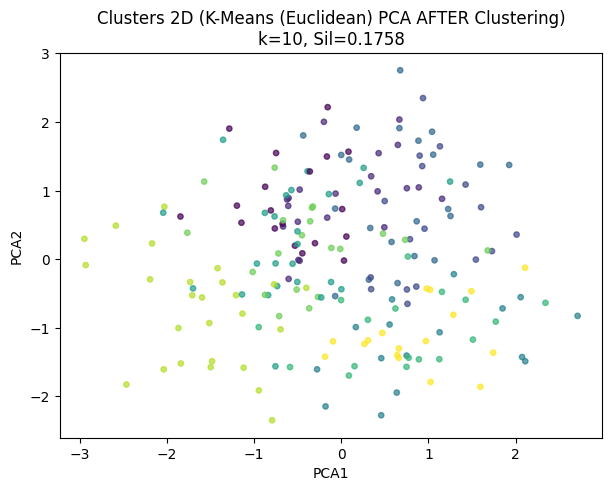

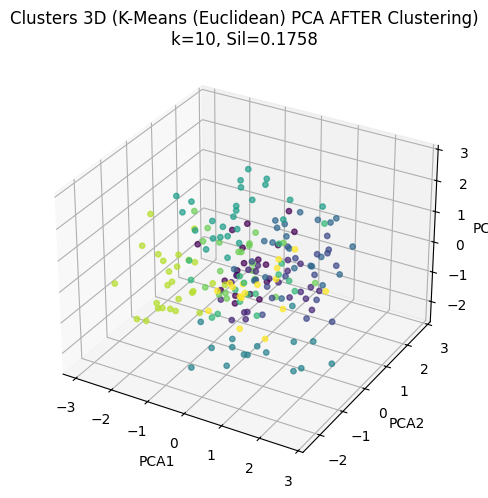

In [124]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_bank_df_pca_after[:,0], scaled_bank_df_pca_after[:,1],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_bank_df_pca_after[:,0], scaled_bank_df_pca_after[:,1], scaled_bank_df_pca_after[:,2],
    c=labels_scaled_euc_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (K-Means (Euclidean) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Normalised K-Means (Cosine Distance) PCA BEFORE clustering


=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===


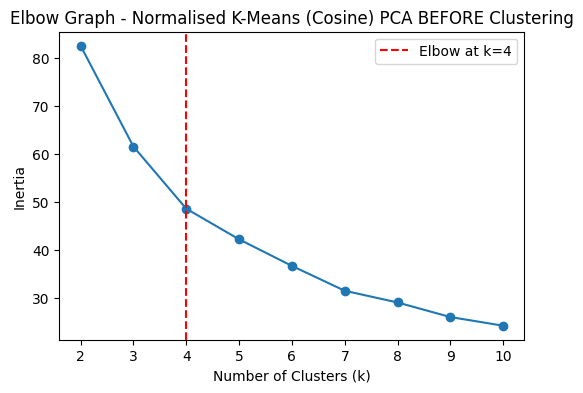

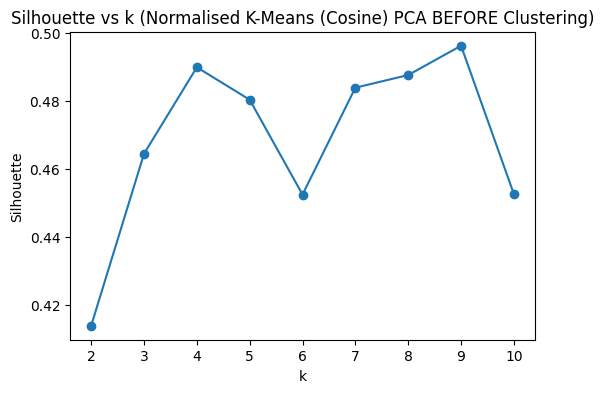

Best k (Silhouette) = 9, Score = 0.4962


In [125]:
from sklearn.preprocessing import normalize

print("\n=== Normalised K-Means (Cosine) PCA BEFORE Clustering ===")

# scale then normalise
scaled_bank_df = scaler.fit_transform(new_bank_df)
scaled_normalized_bank_df = normalize(scaled_bank_df)

# PCA before clustering
pca_scaled_norm_before = PCA(n_components=3, random_state=42)
scaled_norm_bank_df_pca_before = pca_scaled_norm_before.fit_transform(scaled_normalized_bank_df)

# elbow graph
best_k = plot_elbow(scaled_norm_bank_df_pca_before, "Normalised K-Means (Cosine) PCA BEFORE Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_norm_bank_df_pca_before)
    score = silhouette_score(scaled_norm_bank_df_pca_before, labels, metric='cosine')
    silhouette_scores.append(score)
    
# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA BEFORE Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_before = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_before = kmeans_scaled_cos_pca_before.fit_predict(scaled_norm_bank_df_pca_before)

In [126]:
# store silhouette score for experiment analysis visualisation
bank_silhouette_scores_3 = silhouette_scores.copy()

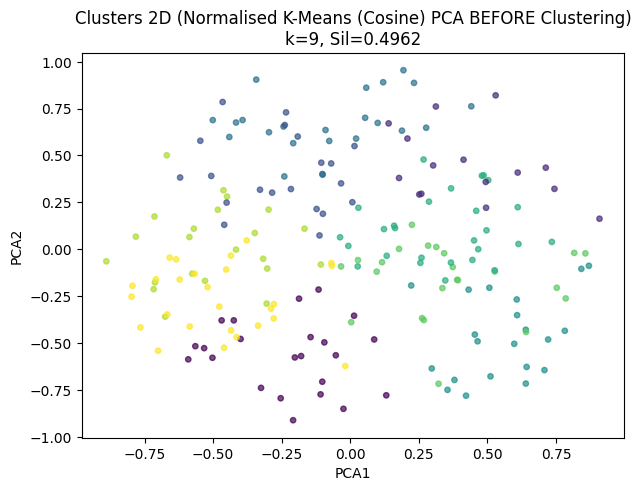

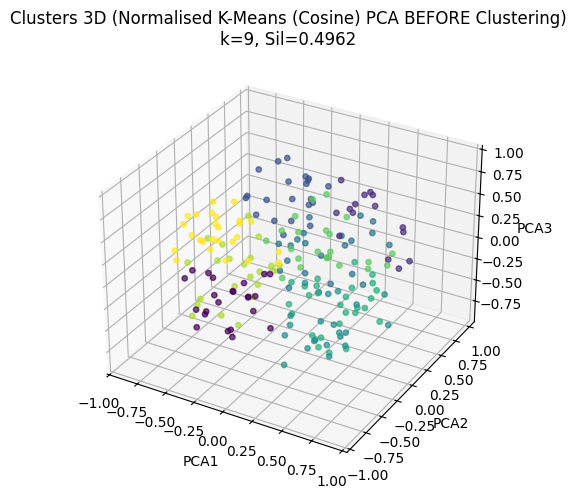

In [127]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_bank_df_pca_before[:,0], scaled_norm_bank_df_pca_before[:,1],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_bank_df_pca_before[:,0], scaled_norm_bank_df_pca_before[:,1], scaled_norm_bank_df_pca_before[:,2],
    c=labels_scaled_cos_pca_before, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA BEFORE Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()


=== Normalised K-Means (Cosine) PCA AFTER Clustering ===


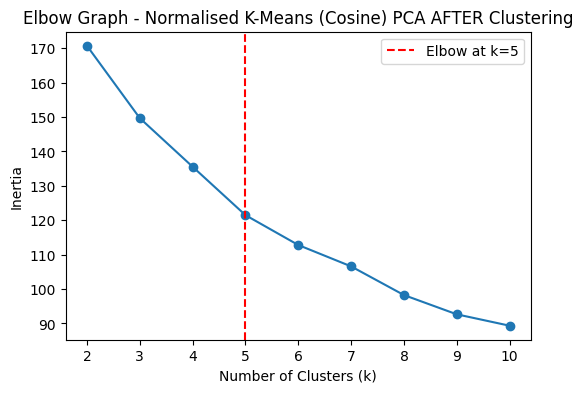

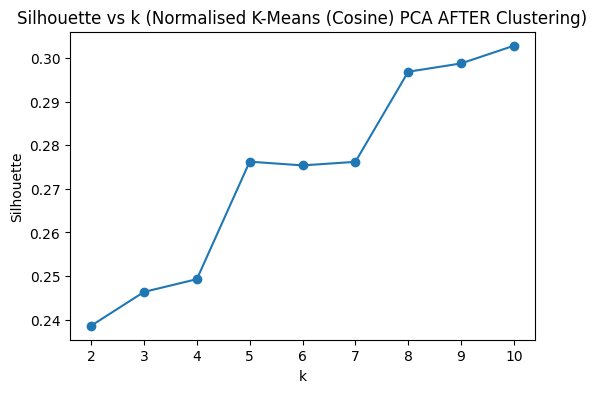

Best k (Silhouette) = 10, Score = 0.3028


In [128]:
print("\n=== Normalised K-Means (Cosine) PCA AFTER Clustering ===")

# scale then normalise
scaled_bank_df = scaler.fit_transform(new_bank_df)
scaled_normalized_bank_df = normalize(scaled_bank_df)

# elbow graph
best_k = plot_elbow(scaled_normalized_bank_df, "Normalised K-Means (Cosine) PCA AFTER Clustering")

# silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_normalized_bank_df)
    score = silhouette_score(scaled_normalized_bank_df, labels, metric='cosine')
    silhouette_scores.append(score)

# plot silhouette score graph
plt.figure(figsize=(6,4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Silhouette vs k (Normalised K-Means (Cosine) PCA AFTER Clustering)')
plt.show()

# choose best k from silhouette
best_k_sil = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k (Silhouette) = {best_k_sil}, Score = {max(silhouette_scores):.4f}")

# run final K-Means with best k
kmeans_scaled_cos_pca_after = KMeans(n_clusters=best_k_sil, random_state=42, n_init=10)
labels_scaled_cos_pca_after = kmeans_scaled_cos_pca_after.fit_predict(scaled_normalized_bank_df)

# PCA after clustering
pca_scaled_norm_after = PCA(n_components=3, random_state=42)
scaled_norm_bank_df_pca_after = pca_scaled_norm_after.fit_transform(scaled_normalized_bank_df)

In [129]:
# store silhouette score for experiment analysis visualisation
bank_silhouette_scores_4 = silhouette_scores.copy()

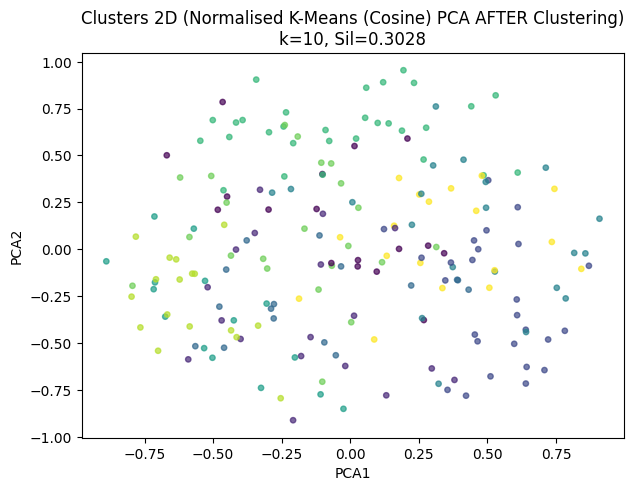

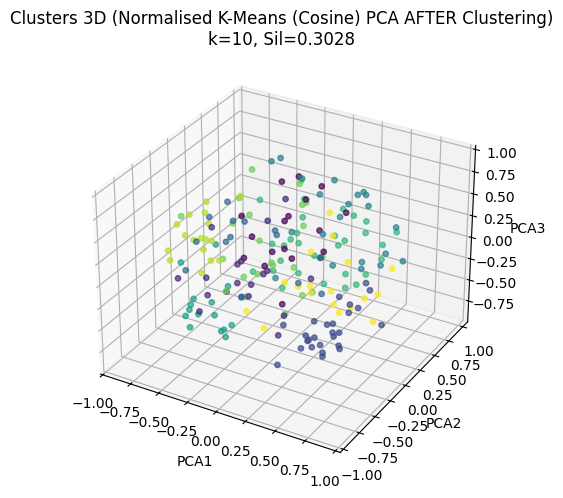

In [130]:
# 2D scatter plot
plt.figure(figsize=(7,5))
scatter = plt.scatter(
    scaled_norm_bank_df_pca_after[:,0], scaled_norm_bank_df_pca_after[:,1],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title(
    f"Clusters 2D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.show()

# 3D scatter plot
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

# plot data points
ax.scatter(
    scaled_norm_bank_df_pca_after[:,0], scaled_norm_bank_df_pca_after[:,1], scaled_norm_bank_df_pca_after[:,2],
    c=labels_scaled_cos_pca_after, cmap='viridis', s=15, alpha=0.7
)

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title(
    f"Clusters 3D (Normalised K-Means (Cosine) PCA AFTER Clustering)\n"
    f"k={best_k_sil}, Sil={max(silhouette_scores):.4f}"
)

plt.tight_layout()
plt.show()

# Experiment Analysis
# ------------------------------ Diabetes Dataset ------------------------------------

In [131]:
import pandas as pd

# create a dictionary 
data = {
    "Clustering Scenario": [
        "K-Means (Euclidean) PCA Before Clustering",
        "K-Means (Euclidean) PCA After Clustering",
        "K-Means (Cosine) PCA Before Clustering",
        "K-Means (Cosine) PCA After Clustering"
    ],
    "Silhouette Score": [
        round(max(diabetes_silhouette_scores_1), 4), 
        round(max(diabetes_silhouette_scores_2), 4), 
        round(max(diabetes_silhouette_scores_3), 4), 
        round(max(diabetes_silhouette_scores_4), 4)
    ]
}

# convert to DataFrame
df_scores = pd.DataFrame(data)

# display as table
df_scores.style.format({"Silhouette Score": "{:.4f}"}).hide(axis="index")

# ------------------------------ Body Fat Dataset ------------------------------------

In [132]:
import pandas as pd

# create a dictionary 
data = {
    "Clustering Scenario": [
        "K-Means (Euclidean) PCA Before Clustering",
        "K-Means (Euclidean) PCA After Clustering",
        "K-Means (Cosine) PCA Before Clustering",
        "K-Means (Cosine) PCA After Clustering"
    ],
    "Silhouette Score": [
        round(max(body_silhouette_scores_1), 4), 
        round(max(body_silhouette_scores_2), 4), 
        round(max(body_silhouette_scores_3), 4), 
        round(max(body_silhouette_scores_4), 4)
    ]
}

# convert to DataFrame
df_scores = pd.DataFrame(data)

# display as table
df_scores.style.format({"Silhouette Score": "{:.4f}"}).hide(axis="index")

# ----------------------------- World Bank Dataset ------------------------------------

In [133]:
import pandas as pd

# create a dictionary 
data = {
    "Clustering Scenario": [
        "K-Means (Euclidean) PCA Before Clustering",
        "K-Means (Euclidean) PCA After Clustering",
        "K-Means (Cosine) PCA Before Clustering",
        "K-Means (Cosine) PCA After Clustering"
    ],
    "Silhouette Score": [
        round(max(bank_silhouette_scores_1), 4), 
        round(max(bank_silhouette_scores_2), 4), 
        round(max(bank_silhouette_scores_3), 4), 
        round(max(bank_silhouette_scores_4), 4)
    ]
}

# convert to DataFrame
df_scores = pd.DataFrame(data)

# display as table
df_scores.style.format({"Silhouette Score": "{:.4f}"}).hide(axis="index")